# PMBus on the ZCU104

The ZCU104 has some support for monitoring power rails on the board using PMBus. PYNQ exposes these rails through the get_rails function that returns a dictionary of all of the rails available to be monitored.

In [1]:
import pynq

rails = pynq.get_rails()
rails

{'12V': Rail {name=12V, voltage=Sensor {name=12V_voltage, value=12.113V}, current=Sensor {name=12V_current, value=1.159A}, power=Sensor {name=12V_power, value=14.05W}},
 '1V13': Rail {name=1V13, voltage=Sensor {name=1V13_voltage, value=1.125V}, current=Sensor {name=1V13_current, value=0.218A}, power=Sensor {name=1V13_power, value=0.21875W}},
 '1V2': Rail {name=1V2, voltage=Sensor {name=1V2_voltage, value=1.203V}, current=Sensor {name=1V2_current, value=0.234A}, power=Sensor {name=1V2_power, value=0.28125W}},
 '1V8': Rail {name=1V8, voltage=Sensor {name=1V8_voltage, value=1.804V}, current=Sensor {name=1V8_current, value=0.328A}, power=Sensor {name=1V8_power, value=0.5625W}},
 '3V3': Rail {name=3V3, voltage=Sensor {name=3V3_voltage, value=3.304V}, current=Sensor {name=3V3_current, value=0.625A}, power=Sensor {name=3V3_power, value=2.0W}},
 '5V0': Rail {name=5V0, voltage=Sensor {name=5V0_voltage, value=5.0V}, current=Sensor {name=5V0_current, value=0.0A}, power=Sensor {name=5V0_power, val

As can be seen, the keys of the dictionary are the names of the voltage rails while the values are `Rail` objects which contain three sensors for the voltage, current and power. Due to limitations of the regulators used on the ZCU104 the resolution of most of the power rails are only to 1/8 W.

To see how power changes under CPU load we can use the `DataRecorder` class. For this example we are going to look at total board power as we load one of the CPU cores in Python.

In [2]:
recorder = pynq.DataRecorder(rails['12V'].power)

We can now use the recorder to monitor the applied sensor. For this example we'll sample the power every half second while sleeping and performing a dummy loop

In [3]:
import time
with recorder.record(0.5):
    time.sleep(10)
    for _ in range(10000000):
        pass
    time.sleep(10)

The `DataRecorder` exposes the sensor data as a pandas dataframe

In [4]:
recorder.frame

,Invocation,12V_power
2018-06-12 14:10:14.590922,0,14.300
2018-06-12 14:10:15.091951,0,13.825
2018-06-12 14:10:15.592879,0,13.825
2018-06-12 14:10:16.093752,0,13.825
2018-06-12 14:10:16.594644,0,13.800
2018-06-12 14:10:17.095583,0,13.825
2018-06-12 14:10:17.596424,0,13.825
2018-06-12 14:10:18.097266,0,13.825
2018-06-12 14:10:18.598133,0,13.800
2018-06-12 14:10:19.098978,0,13.800


or by plotting the results using matplotlib

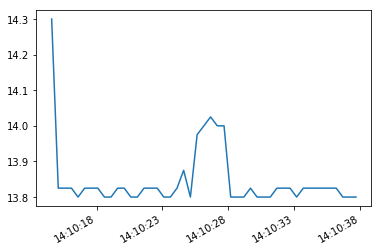

In [5]:
%matplotlib inline
recorder.frame['12V_power'].plot()

We can get more information by using the `mark` function which will increment the invocation number without having to stop and start the recorder

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f728c9f60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f71de17f0>], dtype=object)

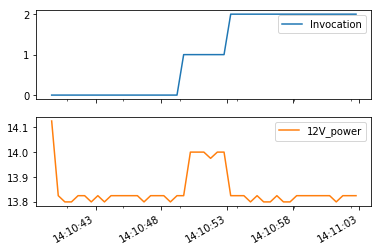

In [6]:
recorder.reset()
with recorder.record(0.5):
    time.sleep(10)
    recorder.mark()
    for _ in range(10000000):
        pass
    recorder.mark()
    time.sleep(10)
    
recorder.frame.plot(subplots=True)

This clearly shows the power spike when the for loop starts running.